# **REQUIREMENTS**

In [1]:
!pip install keras-tuner



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install lightgbm scikit-learn keras



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1. BASIC DATAFRAMES OVERVIEW**

In [3]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
# file_path = '/content/drive/MyDrive/can/updated_can_dataset.csv'
df = pd.read_csv(r'C:\Users\kiran\Desktop\os el\csv files\updated_can_dataset.csv')
#Replace your_folder/your_file.csv with the correct path where your CSV is stored.
print(df.shape)

(16569475, 14)


In [7]:
# Check value counts
print(df['Label'].value_counts())

# Sample 1000 normal, 50 of each attack
normal_df = df[df['Label'] == 'Normal'].sample(n=1000, random_state=42)
dos_df    = df[df['Label'] == 'DoS'].sample(n=50, random_state=42)
fuzzy_df  = df[df['Label'] == 'Fuzzy'].sample(n=50, random_state=42)
imp_rpm_df = df[df['Label'] == 'Impersonation_rpm'].sample(n=50, random_state=42)
imp_gear_df = df[df['Label'] == 'Impersonation_gear'].sample(n=50, random_state=42)


# Combine into one small imbalanced dataset
small_df = pd.concat([normal_df, dos_df, fuzzy_df, imp_gear_df, imp_rpm_df])
small_df.to_csv("small_CAN_dataset.csv", index=False)

Label
Normal                14237958
Impersonation_rpm       654897
Impersonation_gear      597252
DoS                     587521
Fuzzy                   491847
Name: count, dtype: int64


In [8]:
df=small_df


In [21]:
df.shape    

(16569475, 15)

In [2]:
df.describe(include='all')

,Timestamp,CAN ID,DLC,data1,data2,data3,data4,data5,data6,data7,data8,Label,Datetime,SecondsSinceStart
count,1.656948e+07,1.656948e+07,1.656948e+07,1.656948e+07,1.656948e+07,1.656948e+07,1.656948e+07,1.656948e+07,1.656948e+07,1.656948e+07,1.656948e+07,16569475,16569475,1.656948e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,13896271,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,2016-11-03 19:21:46.659210920,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14237958,4,NaN
mean,1.478197e+09,7.048842e+02,7.937015e+00,3.049707e+02,1.943530e+02,8.110012e+01,1.771227e+02,1.121730e+02,1.342131e+02,5.539590e+01,1.187633e+02,NaN,NaN,5.501790e+03
std,3.447091e+03,3.977546e+02,5.872882e-01,5.273629e+02,2.862775e+02,1.303835e+02,2.415236e+02,1.726643e+02,1.828051e+02,1.305977e+02,1.878880e+02,NaN,NaN,3.447091e+03
min,1.478191e+09,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
25%,1.478193e+09,3.390000e+02,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.379954e+03
50%,1.478196e+09,7.900000e+02,8.000000e+00,8.000000e+00,8.000000e+01,0.000000e+00,3.200000e+01,2.100000e+01,5.000000e+01,0.000000e+00,0.000000e+00,NaN,NaN,5.404913e+03
75%,1.478200e+09,1.072000e+03,8.000000e+00,2.610000e+02,2.610000e+02,1.500000e+02,3.110000e+02,2.630000e+02,2.950000e+02,9.000000e+00,2.640000e+02,NaN,NaN,9.214713e+03


In [3]:
df.tail(10)

,Timestamp,CAN ID,DLC,data1,data2,data3,data4,data5,data6,data7,data8,Label,Datetime,SecondsSinceStart
16569465,1.478201e+09,305,8,1411,661,0,0,131,295,9,19,Normal,2016-11-03 19:26:49.053147078,10179.008033
16569466,1.478201e+09,320,8,0,0,0,0,34,0,65,257,Normal,2016-11-03 19:26:49.053388119,10179.008274
16569467,1.478201e+09,848,8,5,80,278,260,279,0,0,118,Normal,2016-11-03 19:26:49.053622007,10179.008508
16569468,1.478201e+09,1264,8,0,0,0,296,0,261,521,25,Normal,2016-11-03 19:26:49.056291103,10179.011177
16569469,1.478201e+09,790,8,5,81,72,16,51,48,0,273,Normal,2016-11-03 19:26:49.057781935,10179.012668
16569470,1.478201e+09,399,8,1430,311,0,0,0,101,0,0,Normal,2016-11-03 19:26:49.058007002,10179.012893
16569471,1.478201e+09,608,8,54,81,51,72,8,323,265,37,Normal,2016-11-03 19:26:49.058237076,10179.013123
16569472,1.478201e+09,672,8,84,0,340,41,337,2,393,0,Normal,2016-11-03 19:26:49.058470964,10179.013357
16569473,1.478201e+09,809,8,1348,903,295,32,23,50,0,32,Normal,2016-11-03 19:26:49.058702946,10179.013589
16569474,1.478201e+09,1349,8,1332,0,0,313,0,0,0,0,Normal,2016-11-03 19:26:49.058943987,10179.013830


In [14]:
df.head()

,Timestamp,CAN ID,DLC,data1,data2,data3,data4,data5,data6,data7,data8,Label,Datetime,SecondsSinceStart,EncodedLabel
12577375,1.478191e+09,304,8,25,662,0,597,66,296,18,296,Normal,2016-11-03 16:42:47.023417950,324.727880,4
29483,1.478198e+09,305,8,32,662,0,0,100,295,16,325,Normal,2016-11-03 18:39:59.104393005,7356.808855,4
16081590,1.478201e+09,2,8,0,0,0,0,0,2,7,403,Normal,2016-11-03 19:22:25.042932987,9902.747395,4
421015,1.478199e+09,339,8,0,81,22,597,0,597,0,0,Normal,2016-11-03 18:45:46.588202000,7704.292664,4
7294338,1.478201e+09,790,8,5,81,274,9,51,51,0,273,Normal,2016-11-03 19:24:55.272306919,10052.976769,4


In [ ]:
df.shape


(181283, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16569475 entries, 0 to 16569474
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Timestamp     float64
 1   CAN ID        int64  
 2   DLC           int64  
 3   data1         int64  
 4   data2         int64  
 5   data3         int64  
 6   data4         int64  
 7   data5         int64  
 8   data6         int64  
 9   data7         int64  
 10  data8         int64  
 11  Label         object 
 12  EncodedLabel  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 1.6+ GB


In [10]:
df.dtypes

Timestamp       float64
CAN ID            int64
DLC               int64
data1             int64
data2             int64
data3             int64
data4             int64
data5             int64
data6             int64
data7             int64
data8             int64
Label            object
EncodedLabel      int64
dtype: object

# **2. Summary Statistics**

In [18]:
df.describe(include='all')

,Timestamp,CAN ID,DLC,data1,data2,data3,data4,data5,data6,data7,data8,Label,Datetime,SecondsSinceStart,EncodedLabel
count,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200,1200.000000,1200.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NaN,NaN,NaN
mean,1.478196e+09,704.009167,7.947500,294.083333,207.329167,86.610000,187.165833,118.652500,138.968333,61.855000,127.102500,NaN,2016-11-03 18:07:48.408272640,5426.112735,3.583333
min,1.478191e+09,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2016-11-03 16:37:22.295537949,0.000000,0.000000
25%,1.478193e+09,339.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2016-11-03 17:16:36.660604672,2354.365067,4.000000
50%,1.478196e+09,790.000000,8.000000,5.000000,80.500000,0.000000,32.000000,23.000000,50.000000,0.000000,0.000000,NaN,2016-11-03 18:06:35.102626816,5352.807089,4.000000
75%,1.478200e+09,1087.000000,8.000000,261.000000,261.000000,150.000000,320.000000,263.000000,295.000000,17.000000,273.000000,NaN,2016-11-03 19:07:23.439203328,9001.143666,4.000000
max,1.478201e+09,2039.000000,8.000000,1431.000000,1410.000000,597.000000,597.000000,597.000000,597.000000,593.000000,597.000000,NaN,2016-11-03 19:26:48.940843105,10166.645305,4.000000


# **3. Missing Values**

In [6]:
df.isnull().sum()

Timestamp            0
CAN ID               0
DLC                  0
data1                0
data2                0
data3                0
data4                0
data5                0
data6                0
data7                0
data8                0
Label                0
Datetime             0
SecondsSinceStart    0
dtype: int64

In [ ]:
df = df.dropna(subset=['Datetime', 'SecondsSinceStart'])


In [7]:
import missingno as msno
msno.matrix(df)

ModuleNotFoundError: No module named 'missingno'

# **4. Duplicate Data**

In [8]:
df.duplicated().sum() # nothing is duplicate

2673204

# **5. Unique Values**

In [9]:
df.nunique()

Timestamp            13896271
CAN ID                   2048
DLC                         4
data1                     256
data2                     256
data3                     256
data4                     256
data5                     256
data6                     256
data7                     256
data8                     256
Label                       5
Datetime             13896271
SecondsSinceStart    13896271
dtype: int64

In [10]:
df.shape

(16569475, 14)

In [ ]:
df[df['DLC']==2][ ['CAN ID','data1',  'Label']].value_counts()

,,,count
CAN ID,data1,Label,
1520.0,1.0,Normal,907


In [ ]:
df[df['DLC']==2][ [ 'Label']].value_counts()

,count
Label,
Normal,1321


In [2]:
df [ 'Label'].value_counts()

Label
Normal                14237958
Impersonation_rpm       654897
Impersonation_gear      597252
DoS                     587521
Fuzzy                   491847
Name: count, dtype: int64

In [ ]:
df['Label'] = df['Label'].str.strip()


In [12]:
df[['EncodedLabel','Label']].value_counts()

,,count
EncodedLabel,Label,
1,Normal,1007808
0,DoS,278214


# **6. Correlation Analysis**

In [41]:
df[['CAN ID','DLC','data1','data2','data3','data4','data5','data6','data7','data8']].corr()


,CAN ID,DLC,data1,data2,data3,data4,data5,data6,data7,data8
CAN ID,1.000000,-0.170615,0.192095,-0.067636,0.209884,0.171907,0.304901,-0.009582,0.150098,-0.177796
DLC,-0.170615,1.000000,0.042774,0.055613,0.063666,0.073908,0.048313,0.073748,0.043809,0.064512
data1,0.192095,0.042774,1.000000,0.191279,-0.054218,-0.172307,0.251063,0.136182,-0.064147,-0.126601
data2,-0.067636,0.055613,0.191279,1.000000,0.245703,0.170835,-0.019399,0.152505,-0.069465,0.148006
data3,0.209884,0.063666,-0.054218,0.245703,1.000000,0.055514,0.300230,-0.134273,0.266503,0.113408
data4,0.171907,0.073908,-0.172307,0.170835,0.055514,1.000000,0.115669,0.409391,-0.028464,0.184337
data5,0.304901,0.048313,0.251063,-0.019399,0.300230,0.115669,1.000000,0.277631,0.184735,-0.061014
data6,-0.009582,0.073748,0.136182,0.152505,-0.134273,0.409391,0.277631,1.000000,0.123483,-0.068282
data7,0.150098,0.043809,-0.064147,-0.069465,0.266503,-0.028464,0.184735,0.123483,1.000000,-0.071933
data8,-0.177796,0.064512,-0.126601,0.148006,0.113408,0.184337,-0.061014,-0.068282,-0.071933,1.000000


<Axes: >

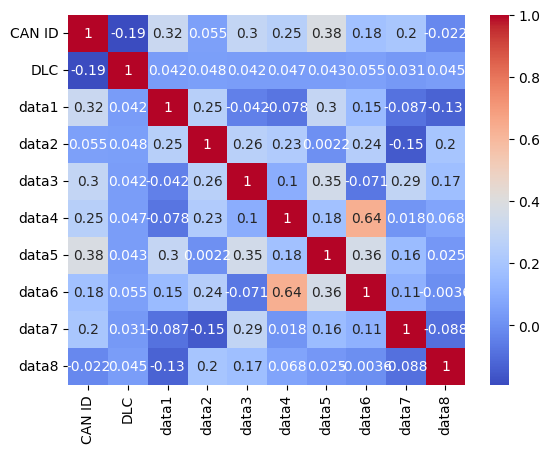

In [ ]:
import seaborn as sns
sns.heatmap(df[['CAN ID','DLC','data1','data2','data3','data4','data5','data6','data7','data8']].corr(), annot=True, cmap='coolwarm')

# **7. Data Distribution**

array([[<Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'CAN ID'}>,
        <Axes: title={'center': 'DLC'}>],
       [<Axes: title={'center': 'data1'}>,
        <Axes: title={'center': 'data2'}>,
        <Axes: title={'center': 'data3'}>],
       [<Axes: title={'center': 'data4'}>,
        <Axes: title={'center': 'data5'}>,
        <Axes: title={'center': 'data6'}>],
       [<Axes: title={'center': 'data7'}>,
        <Axes: title={'center': 'data8'}>, <Axes: >]], dtype=object)

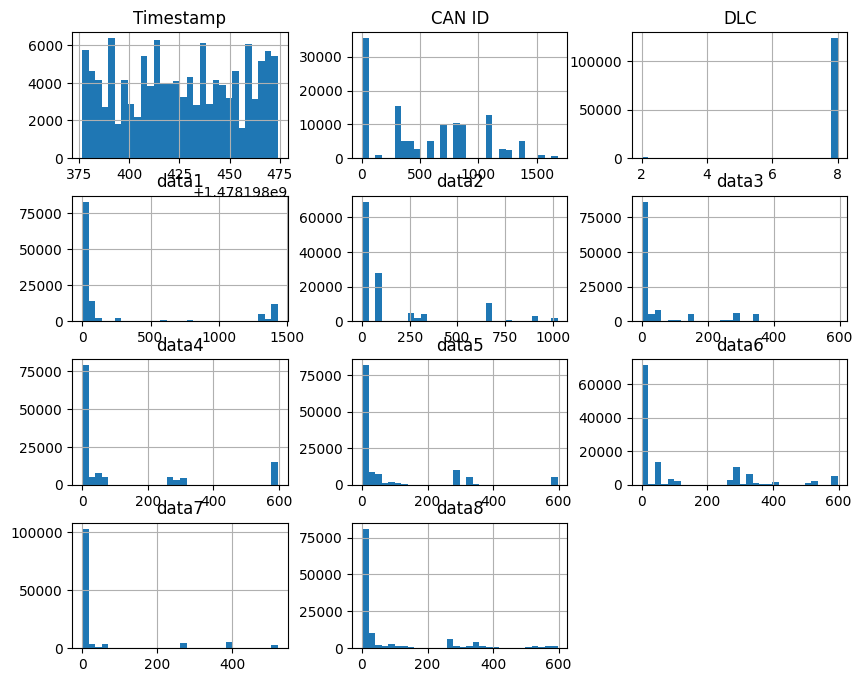

In [ ]:
df.hist(bins=30, figsize=(10, 8))

<Axes: >

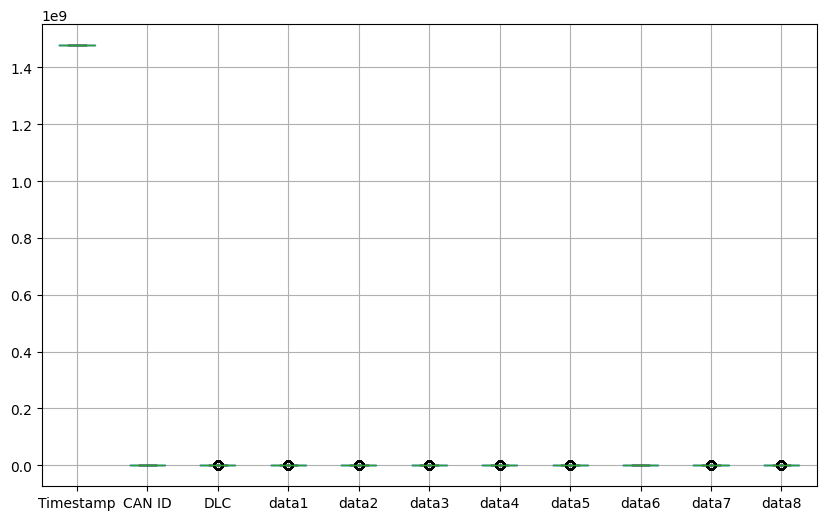

In [ ]:
df.boxplot(figsize=(10, 6))

# **8. Categorical Data Analysis**

<Axes: xlabel='DLC'>

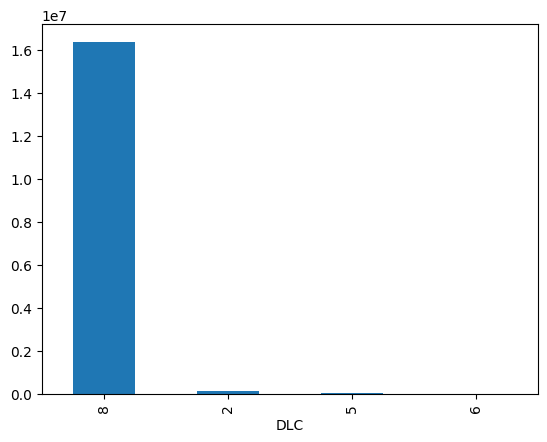

In [5]:
df['DLC'].value_counts().plot(kind='bar')

<Axes: xlabel='Label'>

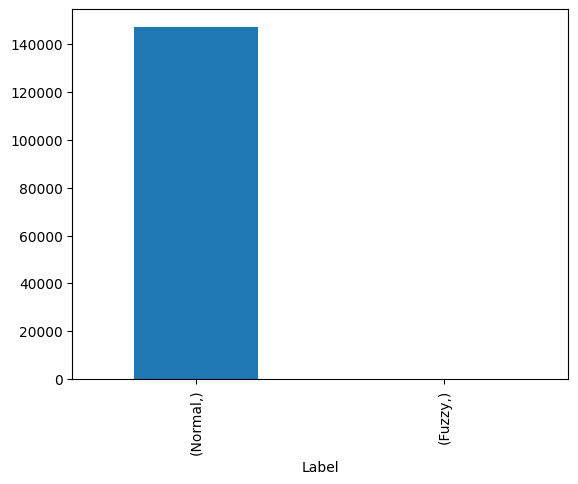

In [4]:
df[df['CAN ID'] == 1520][['Label']].value_counts().head(10).plot(kind='bar')


In [11]:
sns.boxplot(x=df['CAN ID'], y=df['DLC'], width =0.1)

NameError: name 'sns' is not defined

# **adding date tiem column and relative tiem column bold text**

In [11]:
import pandas as pd

# Convert from float timestamp to datetime
df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='s')


In [12]:
df['SecondsSinceStart'] = df['Timestamp'] - df['Timestamp'].min()


In [10]:
# Replace 'df' with the name of your DataFrame
df.to_csv("updated_can_dataset.csv", index=False)


In [ ]:
from google.colab import files
files.download("updated_can_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  Label Encoding (for Attack Labels}

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['EncodedLabel'] = label_encoder.fit_transform(df['Label'])


#**ONLY WHILE EXPERIMENTING TO REDUCE MEMORY USAGE**


In [22]:
# 1. Stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

X = df[['CAN ID', 'data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8','SecondsSinceStart' ]]  # Features
y = df['EncodedLabel']  # Labels

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=50000, random_state=42)
for train_idx, _ in strat_split.split(X, y):
    X_sampled = X.iloc[train_idx]
    y_sampled = y.iloc[train_idx]

# 2. Reassign to avoid rewriting rest of the code
X = X_sampled
y = y_sampled

# 3. Proceed as usual
# (train/test split, model training, etc.)


# **Data Splitting (Train-Test Split)**

In [4]:
                                             
                                             
                                             
                                                # **USE WHILE NOT EXPERIMENTING**
                                                
                                                
                                                
                                                
X = df[['CAN ID','data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8','SecondsSinceStart' ]]  # Features
y = df['EncodedLabel']  # Labels 

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)  #stratify=y



# **Random forest**

# **Finetuning hyperparameters**

# **1. GridSearchCV (Exhaustive Search)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # Ensure this line is present and executed

param_grid = {
    'n_estimators': [100, 200, 300],       # number of trees
    'max_depth': [None, 10, 20, 30],       # tree depth
    'min_samples_split': [2, 5, 10],       # min samples to split
    'min_samples_leaf': [1, 2, 4],         # min samples per leaf
    'max_features': ['sqrt', 'log2'],     # number of features to consider
    'bootstrap': [True, False]            # sampling method
}

rf = RandomForestClassifier(random_state=42,class_weight='balanced')   #class_weight='balanced'#class_weight='balanced'#class_weight='balanced'
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=2,                         #CV=5 andreeeeeeeeeeee StratifiedKFold(n_splits=5) by default stratified k fold cross validaton ee use maadodu
                           scoring='f1_macro', verbose=2)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


KeyboardInterrupt: 

# **2. Using RandomizedSearchCV (Faster, Random Sampling)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier # Ensure this line is present and executed


param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 50, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42,class_weight='balanced')        #class_weight='balanced'#class_weight='balanced'#class_weight='balanced'
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=5, cv=2, verbose=2, n_jobs=4, scoring='f1_macro')     #CV=5 andreeeeeeeeeeee StratifiedKFold(n_splits=5) by default stratified k fold cross validaton ee use maadodu

# since n_jobs was -1 which would use all the cores paralelly the memory for each core would get added causing to fill the RAM and crashing the code or giving the memory error so to solve muutliple core problem i gave only 1 core to run by saying n_jobs=1


random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [6]:
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Ensure this line is present and executed

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Sample 10 random combinations
param_list = list(ParameterSampler(param_dist, n_iter=10, random_state=42))

for i, params in enumerate(param_list):
    rf = RandomForestClassifier(**params, class_weight='balanced', random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=2, scoring='f1_macro')
    print(f"Iteration {i+1}")
    print(f"Params: {params}")
    print(f"F1 Scores: {scores}")
    print(f"Mean F1 Score: {np.mean(scores):.4f}")
    print("-" * 40)


KeyboardInterrupt: 

In [ ]:
from joblib import Parallel, delayed
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import all_estimators


param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


def evaluate_model(params):
    rf = RandomForestClassifier(
                                **params,
                                class_weight='balanced',
                                random_state=42,
                               

                                )
    scores = cross_val_score(rf, X_train, y_train, cv=2, scoring='f1', n_jobs=1)
    mean_score = np.mean(scores)
    print(f"Params: {params}")
    print(f"F1 Scores: {scores}")
    print(f"Mean F1 Score: {mean_score:.4f}")
    print("-" * 40)
    return {'params': params, 'mean_f1': mean_score}

# Sample 10 random hyperparameter sets
from sklearn.model_selection import ParameterSampler
param_list = list(ParameterSampler(param_dist, n_iter=10, random_state=42))

# Run in parallel using all CPU cores
results = Parallel(n_jobs=2)(delayed(evaluate_model)(params) for params in param_list)


# **Random forest training**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [9]:
# Use the best parameters obtained from RandomizedSearchCV
# best_params = random_search.best_params_

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    # **best_params,           # Inject the best hyperparameters
    random_state=42,         # Ensures reproducibility
    class_weight='balanced', # Adjusts weights inversely proportional to class frequencies
    oob_score=True,         # Set to True only if using out-of-bag samples for validation
    
     
                                n_estimators = 100,
                                max_depth = None,
                                min_samples_split = 2,
                                min_samples_leaf = 1
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

In [10]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)



In [12]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)  #target_names=label_encoder.classes_✅ This shows class names like 'normal', 'spoofing', etc., instead of integers.

print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Random Forest Classifier Report:")
print(report_rf)

Random Forest Classifier Accuracy: 1.0
Random Forest Classifier Report:
                    precision    recall  f1-score   support

               DoS       1.00      1.00      1.00    117504
             Fuzzy       1.00      1.00      1.00     98369
Impersonation_gear       1.00      1.00      1.00    119451
 Impersonation_rpm       1.00      1.00      1.00    130979
            Normal       1.00      1.00      1.00   2847592

          accuracy                           1.00   3313895
         macro avg       1.00      1.00      1.00   3313895
      weighted avg       1.00      1.00      1.00   3313895



# **Extra Trees**

# **RandomizedSearchCV hyperparametrs tuning**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 50, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [False],  # ExtraTrees typically uses bootstrap=False
}

et = ExtraTreesClassifier(random_state=42, class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=et,
    param_distributions=param_dist,
    n_iter=50,  # Try 50 random combinations
    cv=1,
    n_jobs=2,
    verbose=2,
    scoring='f1_macro'  # Better for imbalanced datasets

)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
#better for large datasets as searching whole dtaset will take time

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 161}
Best Score: 0.994417445482866


# **implementing extra Trees**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize model
et_model = ExtraTreesClassifier(
    #  **random_search.best_params_,
      random_state=42 ,
     class_weight='balanced',
     
                      n_estimators = 161, 
                      max_depth = 20,
                      min_samples_split = 10, 
                      min_samples_leaf = 1,
                      bootstrap=False,
                      max_features='sqrt',
                      n_jobs=-1

  )

# Train
et_model.fit(X_train, y_train)

# Predict
y_pred = et_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,target_names=label_encoder.classes_))
#instead of encoded label to print the the actual label use (target_names=label_encoder.classes_)


Accuracy: 0.9999921542474942

Classification Report:
                     precision    recall  f1-score   support

               DoS       1.00      1.00      1.00    117504
             Fuzzy       1.00      1.00      1.00     98369
Impersonation_gear       1.00      1.00      1.00    119451
 Impersonation_rpm       1.00      1.00      1.00    130979
            Normal       1.00      1.00      1.00   2847592

          accuracy                           1.00   3313895
         macro avg       1.00      1.00      1.00   3313895
      weighted avg       1.00      1.00      1.00   3313895



# **LightGBM**

In [ ]:
pip install --upgrade scikit-learn joblib

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# 1. Define search space
lgb_param_dist = {
    'num_leaves': randint(16, 128),
    'learning_rate': [ 0.1],   #//0.1    [0.01, 0.05, 0.1],  
    'n_estimators': [100],     #//100    randint(50, 500)
    'min_child_samples': randint(5, 100),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'class_weight': ['balanced']
}



# 2. Instantiate model & CV strategy
lgbm = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(label_encoder.classes_),
    random_state=42,
    n_jobs=2
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#    → Stratified folds preserve class balance for each CV split

# 3. Randomized search
rs_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgb_param_dist,
    n_iter=1,                         # Try 40 random combos
    scoring='f1_macro',                # Macro‐F1 treats all classes equally
    cv=cv,
    verbose=2,
    n_jobs=2,
    random_state=42,
    force_col_wise=True
)
rs_lgbm.fit(X_train, y_train)

print("Best LGBM params:", rs_lgbm.best_params_)
print("LGBM CV f1_macro:", rs_lgbm.best_score_)

# 4. Final train & evaluate
best_lgbm = rs_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm, target_names=label_encoder.classes_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.192540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2167
[LightGBM] [Info] Number of data points in the train set: 13255580, number of used features: 10
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

# ** 1D-CNN with Keras-Tuner**

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import class_weight
# 4. Scale features for DL (tree-based models are scale-invariant so raw X is OK)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 5. Compute class weights once (used by CNN/DNN)
cw_vals = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(cw_vals))

In [6]:
!pip install tensorflow

Access is denied.


In [11]:
import numpy as np
import keras_tuner as kt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam


# ─── 1. Prepare your data (assumes X_train_scaled, X_test_scaled, y_train, y_test, label_encoder exist) ───
# Add the “channel” dimension for Conv1D:
X_tr_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_te_cnn = X_test_scaled .reshape(-1, X_test_scaled .shape[1], 1)

# One-hot encode labels for training:
num_classes = len(label_encoder.classes_)
y_tr_cat   = to_categorical(y_train, num_classes)
# Note: at prediction time we’ll compare argmax back to y_test (which is integer-encoded)

# If you have class imbalance, compute class_weights dict here:
from sklearn.utils.class_weight import compute_class_weight
class_weights = dict(
    zip(np.unique(y_train),
        compute_class_weight('balanced', classes=np.unique(y_train), y=y_train))
)

# ─── 2. Model‐builder for Keras-Tuner ─────────────────────────────────────────────────────────────────────
def build_cnn(hp):
    seq_len = X_tr_cnn.shape[1]
    m = Sequential()
    # First Conv + Safe Pooling
    m.add(Conv1D(
        filters=hp.Choice('f1', [32, 64, 128]),
        kernel_size=hp.Choice('k1', [3, 5]),
        activation='relu',
        input_shape=(seq_len, 1)
    ))
    m.add(MaxPooling1D(pool_size=2, padding='same'))
    # Second Conv + Safe Pooling
    m.add(Conv1D(
        filters=hp.Choice('f2', [64, 128]),
        kernel_size=3,
        activation='relu'
    ))
    m.add(MaxPooling1D(pool_size=2, padding='same'))

    m.add(Flatten())
    m.add(Dense(
        units=hp.Int('dense_units', 64, 256, step=64),
        activation='relu'
    ))
    m.add(Dropout(rate=hp.Float('dropout', 0.3, 0.7, step=0.2)))
    m.add(Dense(num_classes, activation='softmax'))

    m.compile(
        optimizer=Adam(), 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    return m

# ─── 3. Instantiate Hyperband tuner ─────────────────────────────────────────────────────────────────────
tuner = kt.Hyperband(
    build_cnn,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='cnn_tuning',
    project_name='can_cnn',
    max_consecutive_failed_trials=10   # allow more bad builds
)

# ─── 4. Run the search with early stopping ─────────────────────────────────────────────────────────────
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tuner.search(
    X_tr_cnn,
    y_tr_cat,
    epochs=50,
    validation_split=0.1,
    #class_weight=class_weights,   # uncomment if you computed class_weights
    callbacks=[es],
    verbose=2
)

# ─── 5. Retrieve the best model & evaluate ──────────────────────────────────────────────────────────────
best_cnn = tuner.get_best_models(1)[0]

# Predict & decode back to integer labels
y_pred_proba = best_cnn.predict(X_te_cnn)
y_pred       = np.argmax(y_pred_proba, axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Reloading Tuner from cnn_tuning\can_cnn\tuner0.json


c:\Users\kiran\Desktop\os el\myvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kiran\Desktop\os el\myvenv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


103560/103560 ━━━━━━━━━━━━━━━━━━━━ 119s 1ms/step
                    precision    recall  f1-score   support

               DoS       0.94      1.00      0.97    117504
             Fuzzy       0.98      0.90      0.94     98369
Impersonation_gear       0.86      1.00      0.93    119451
 Impersonation_rpm       1.00      1.00      1.00    130979
            Normal       1.00      0.99      0.99   2847592

          accuracy                           0.99   3313895
         macro avg       0.95      0.98      0.96   3313895
      weighted avg       0.99      0.99      0.99   3313895



# **Fully-Connected DNN **

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# Assume these already exist from your preprocessing step:
# X_train_scaled, X_test_scaled, y_train, y_test, class_weights, num_classes
num_classes = len(np.unique(y_train))

# If y_train is integer encoded, convert to categorical for multi-class classification
y_train_cat = to_categorical(y_train, num_classes)

input_dim = X_train_scaled.shape[1]

def build_dnn(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(input_dim,)
    ))
    model.add(Dropout(rate=hp.Float('dropout', 0.2, 0.6, step=0.1)))
    
    # Optionally add a second dense layer
    if hp.Boolean("second_layer"):
        model.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(Dropout(rate=hp.Float('dropout_2', 0.2, 0.6, step=0.1)))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_dnn,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='dnn_tuning',
    project_name='dnn_project'
)

# Early stopping callback
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the tuner search using the scaled data and class weights
tuner.search(
    X_train_scaled,
    y_train_cat,
    epochs=50,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[es],
    verbose=2
)

# Get best model and evaluate
best_dnn = tuner.get_best_models(num_models=1)[0]

y_pred_prob = best_dnn.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Reloading Tuner from dnn_tuning\dnn_project\tuner0.json



c:\Users\kiran\Desktop\os el\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kiran\Desktop\os el\myvenv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


 75414/103560 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step

KeyboardInterrupt: 

In [32]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ------- -------------------------------- 20.5/106.6 kB ? eta -:--:--
     ------------------------ ------------ 71.7/106.6 kB 975.2 kB/s eta 0:00:01
     ------------------------------------ 106.6/106.6 kB 875.8 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 3.5 MB/s eta 0:00:03
   - -------------------------------------- 0.2/8.1 MB 2.2 MB/s eta 0:00:04
   - -------------------------------------- 0.4/8.1 MB 2.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.1 MB 2.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.1 MB 2.8 MB/s eta 0:00:03
   --- ---------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# Assume X_train_scaled, X_test_scaled, y_train, y_test, label_encoder already exist
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)

input_dim = X_train_scaled.shape[1]

# Compute class weights
class_weights = dict(enumerate(compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train), y=y_train)))

# Build DNN with more tunable hyperparameters
def build_dnn(hp):
    model = Sequential()
    for i in range(hp.Int("num_layers", 1, 4)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', 32, 256, step=32),
            activation='relu'
        ))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    model.add(Dense(num_classes, activation='softmax'))

    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'nadam'])
    lr = hp.Choice('lr', [1e-2, 1e-3, 1e-4])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    else:
        optimizer = Nadam(learning_rate=lr)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Tuner setup
tuner = kt.Hyperband(
    build_dnn,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='dnn_tuning_v2',
    project_name='better_dnn'
)

# Early stopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Search
history = tuner.search(
    X_train_scaled, y_train_cat,
    epochs=50,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[es],
    verbose=2
)

# Best model
best_dnn = tuner.get_best_models(num_models=1)[0]

# Predict and report
y_pred_prob = best_dnn.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Plot learning curves
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
hist = best_trial.metrics.get_history()

plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.plot(hist['val_loss'], label='val_loss')
plt.title("Validation Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.show()


Trial 40 Complete [00h 48m 30s]
val_accuracy: 0.9997835159301758

Best val_accuracy So Far: 0.9999110102653503
Total elapsed time: 21h 36m 08s

Search: Running Trial #41

Value             |Best Value So Far |Hyperparameter
2                 |3                 |num_layers
224               |64                |units_0
0.4               |0.2               |dropout_0
nadam             |nadam             |optimizer
0.0001            |0.0001            |lr
32                |224               |units_1
0.4               |0.2               |dropout_1
96                |192               |units_2
0.4               |0.3               |dropout_2
64                |128               |units_3
0.3               |0.3               |dropout_3
6                 |6                 |tuner/epochs
2                 |2                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
1                 |1                 |tuner/round
0033              |0018              |tuner/trial_i

KeyboardInterrupt: 

In [34]:
# After stopping, retrieve the top trial:
#hindeeeeeeeeeeeeeee odsid program tumbaa jasti odtittu adikke interuppt maadi next 2 lines run madudre best hyperparameters aa variable olgade hogutte

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters so far:", best_hp.values)


Best hyperparameters so far: {'num_layers': 3, 'units_0': 64, 'dropout_0': 0.2, 'optimizer': 'nadam', 'lr': 0.0001, 'units_1': 224, 'dropout_1': 0.2, 'units_2': 192, 'dropout_2': 0.30000000000000004, 'units_3': 128, 'dropout_3': 0.30000000000000004, 'tuner/epochs': 6, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': '0018'}


In [9]:
best_hp={'num_layers': 3, 'units_0': 64, 'dropout_0': 0.2, 'optimizer': 'nadam', 'lr': 0.0001, 'units_1': 224, 'dropout_1': 0.2, 'units_2': 192, 'dropout_2': 0.30000000000000004, 'units_3': 128, 'dropout_3': 0.30000000000000004, 'tuner/epochs': 6, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': '0018'}

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

# Unpack values:
num_classes = len(np.unique(y_train))

n_layers   = 3
opt_name   = 'nadam'
lr         = 0.0001

# Choose optimizer instance
if   opt_name == 'adam':    optimizer = Adam(learning_rate=lr)
elif opt_name == 'rmsprop': optimizer = RMSprop(learning_rate=lr)
else:                       optimizer = Nadam(learning_rate=lr)

# Build the model
model = Sequential()
for i in range(n_layers):
    units = best_hp.get(f'units_{i}')
    drop  = best_hp.get(f'dropout_{i}')
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(drop))

model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train on full training set (with class weights, early stopping, etc.)
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=50,                  # or whatever max you like
    validation_split=0.2,
    class_weight=class_weights, 
    callbacks=[es],             # your EarlyStopping callback
    verbose=2
)


Epoch 1/50
331390/331390 - 837s - 3ms/step - accuracy: 0.9947 - loss: 0.0095 - val_accuracy: 0.9997 - val_loss: 0.0038
Epoch 2/50
331390/331390 - 793s - 2ms/step - accuracy: 0.9984 - loss: 0.0041 - val_accuracy: 0.9996 - val_loss: 0.0035
Epoch 3/50
331390/331390 - 788s - 2ms/step - accuracy: 0.9985 - loss: 0.0043 - val_accuracy: 0.9995 - val_loss: 0.0052
Epoch 4/50
331390/331390 - 845s - 3ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9999 - val_loss: 8.4974e-04
Epoch 5/50
331390/331390 - 857s - 3ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 6/50
331390/331390 - 800s - 2ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 7/50
331390/331390 - 801s - 2ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 8/50
331390/331390 - 803s - 2ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 9/50
331390/331390 - 845s - 3ms/step -

In [14]:
y_pred = best_dnn.predict(X_test_scaled).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


103560/103560 ━━━━━━━━━━━━━━━━━━━━ 73s 699us/step
                    precision    recall  f1-score   support

               DoS       0.75      1.00      0.86    117504
             Fuzzy       0.96      0.85      0.90     98369
Impersonation_gear       0.79      1.00      0.89    119451
 Impersonation_rpm       1.00      1.00      1.00    130979
            Normal       0.99      0.97      0.98   2847592

          accuracy                           0.97   3313895
         macro avg       0.90      0.96      0.93   3313895
      weighted avg       0.98      0.97      0.97   3313895



# **META MODEL**

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# 1. Model predictions (probabilities)
# Get model predictions for each base model
probs_rf = rf_model.predict_proba(X_test)
probs_et = et_model.predict_proba(X_test)
probs_lgb = best_lgbm.predict_proba(X_test)

# For CNN and DNN, reshape and get predictions
X_te_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)  # Reshaping for CNN input
probs_cnn = best_cnn.predict(X_te_cnn)

probs_dnn = best_dnn.predict(X_test_scaled)  # Assuming DNN is already trained

# 2. Stack model probabilities horizontally (combine predictions)
stacked_probs = np.hstack([probs_rf, probs_et, probs_lgb, probs_cnn, probs_dnn])

# 3. Meta-models setup (Logistic Regression and RandomForestClassifier)

# # Logistic Regression Meta-Model
# logreg_meta_model = LogisticRegression(max_iter=1000)

# Random Forest Meta-Model
rf_meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation for the Meta-model

# # Cross-validation for Logistic Regression
# logreg_cv_scores = cross_val_score(logreg_meta_model, stacked_probs, y_test, cv=5, scoring='accuracy')
# print(f"Logistic Regression CV Accuracy: {logreg_cv_scores.mean():.4f} ± {logreg_cv_scores.std():.4f}")

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_meta_model, stacked_probs, y_test, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

# 4. Train the chosen meta-model on the stacked probabilities

# # Train Logistic Regression meta-model
# logreg_meta_model.fit(stacked_probs, y_test)

# Train Random Forest meta-model
rf_meta_model.fit(stacked_probs, y_test)

# 5. Final predictions from the meta-model

# # Using Logistic Regression for final predictions
# final_preds_logreg = logreg_meta_model.predict(stacked_probs)

# Using Random Forest for final predictions
final_preds_rf = rf_meta_model.predict(stacked_probs)

# # 6. Evaluate the final models

# print("Final Stacked Model (Logistic Regression) Classification Report:")
# print(classification_report(y_test, final_preds_logreg, target_names=label_encoder.classes_))

print("Final Stacked Model (Random Forest) Classification Report:")
print(classification_report(y_test, final_preds_rf, target_names=label_encoder.classes_))


103560/103560 ━━━━━━━━━━━━━━━━━━━━ 177s 2ms/step
103560/103560 ━━━━━━━━━━━━━━━━━━━━ 102s 983us/step
Random Forest CV Accuracy: 1.0000 ± 0.0000
Final Stacked Model (Random Forest) Classification Report:
                    precision    recall  f1-score   support

               DoS       1.00      1.00      1.00    117504
             Fuzzy       1.00      1.00      1.00     98369
Impersonation_gear       1.00      1.00      1.00    119451
 Impersonation_rpm       1.00      1.00      1.00    130979
            Normal       1.00      1.00      1.00   2847592

          accuracy                           1.00   3313895
         macro avg       1.00      1.00      1.00   3313895
      weighted avg       1.00      1.00      1.00   3313895



#**✅ 1. Save and Load Traditional ML Models (RF, ET, LGBM) using joblib or pickle**

**TO SAVE**

In [19]:
import joblib

# # joblib.dump(rf_model, 'rf_model.pkl')
# # joblib.dump(et_model, 'et_model.pkl')
# joblib.dump(best_lgbm, 'lgbm_model.pkl')
joblib.dump(rf_meta_model, 'meta_rf_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')  # Save your scaler too
# joblib.dump(label_encoder, 'label_encoder.pkl')


['meta_rf_model.pkl']

In [12]:
best_cnn.save('cnn_model.h5')



**LOAD LATER**

In [ ]:
import joblib

rf_model = joblib.load('rf_model.pkl')
et_model = joblib.load('et_model.pkl')
best_lgbm = joblib.load('lgbm_model.pkl')
rf_meta_model = joblib.load('meta_rf_model.pkl')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')


**✅ 2. Save and Load Deep Learning Models (CNN, DNN) using TensorFlow/Keras**

In [10]:
#TO SAVE

# best_cnn.save('cnn_model.h5')
best_dnn.save('dnn_model.h5')


In [13]:
#TO LOAD LATER
from tensorflow.keras.models import load_model

best_cnn = load_model('cnn_model.h5')
best_dnn = load_model('dnn_model.h5')


**##TO LOAD LATER AFTER OFF and ON i.e to eithwe predict on a test data or to aplly in realtime sysytem**

**PREDICTING ON TEST DATA**

<!-- 🔹1. Prepare new test data (X_new)
You must preprocess and scale your new input (X_new) in the same way as you did for the original test data (X_test): -->
X_new_scaled = scaler.transform(X_new)  # Assuming you used a scaler


In [ ]:
#  Get base model predictions on X_new
# Get predicted probabilities from base models
probs_rf_new = rf_model.predict_proba(X_new)
probs_et_new = et_model.predict_proba(X_new)
probs_lgb_new = best_lgbm.predict_proba(X_new)

# Reshape for CNN
X_new_cnn = X_new_scaled.reshape(-1, X_new_scaled.shape[1], 1)
probs_cnn_new = best_cnn.predict(X_new_cnn)

# Predict with DNN
probs_dnn_new = best_dnn.predict(X_new_scaled)

In [ ]:
# 3. Stack the new probabilities
stacked_probs_new = np.hstack([probs_rf_new, probs_et_new, probs_lgb_new, probs_cnn_new, probs_dnn_new])

In [ ]:
# 🔹4. Use the trained meta-model for prediction 
final_prediction = rf_meta_model.predict(stacked_probs_new)

In [ ]:
# 🧠 Optional: Get class labels back (if you encoded them)
final_labels = label_encoder.inverse_transform(final_prediction)
# ✅ Final Output
# Now, final_prediction or final_labels contains the detected class labels for your new input X_new.



**🚗 Real-Time CAN Bus Intrusion Detection Using Your Trained Meta-Model**